<a href="https://colab.research.google.com/github/parisazeynaly/explainable-toxic-comment-detection/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
test= pd.read_csv("test.csv")
train= pd.read_csv("train.csv")

In [13]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (159571, 8)
Test shape: (153164, 2)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB

Test Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB

Train Describe:


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Missing values in train:
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Missing values in test:
 id              0
comment_text    0
dtype: int64


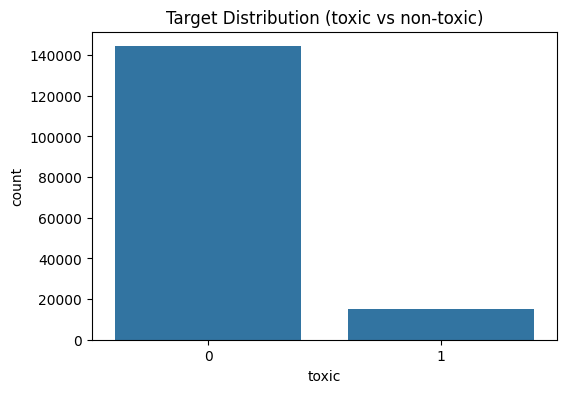

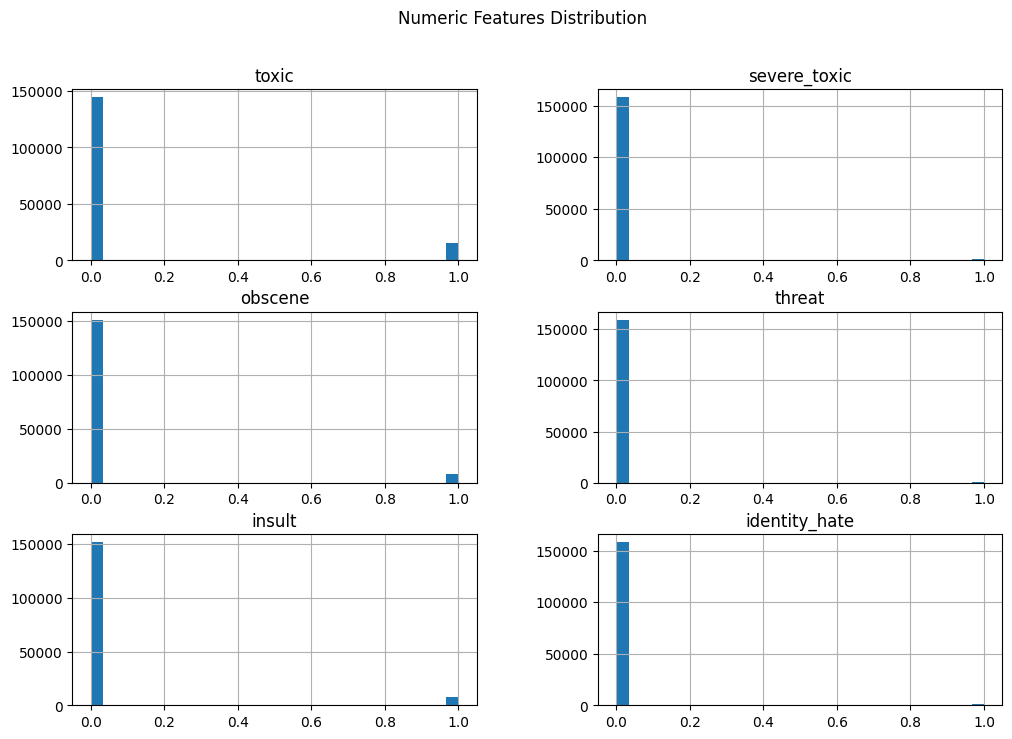

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. نمایش اولیه
display(train.head())
display(test.head())

print("Train Info:")
train.info()
print("\nTest Info:")
test.info()

# 2. خلاصه آماری
print("\nTrain Describe:")
display(train.describe())

# 3. مقادیر گمشده
print("\nMissing values in train:\n", train.isnull().sum())
print("\nMissing values in test:\n", test.isnull().sum())

# 4. توزیع تارگت
if "toxic" in train.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="toxic", data=train)
    plt.title("Target Distribution (toxic vs non-toxic)")
    plt.show()

# 5. توزیع فیچرهای عددی
numeric_cols = train.select_dtypes(include=['int64','float64']).columns
train[numeric_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Numeric Features Distribution")
plt.show()


In [19]:
import pandas as pd

# --- حذف مقادیر گمشده ---
print("Before dropna:", train.shape)
train = train.dropna(subset=["comment_text"])
print("After dropna:", train.shape)

print("Before dropna test:", test.shape)
test = test.dropna(subset=["comment_text"])
print("After dropna test:", test.shape)

# --- حذف ردیف‌های تکراری ---
print("Before drop_duplicates:", train.shape)
train = train.drop_duplicates(subset=["comment_text"])
print("After drop_duplicates:", train.shape)

# --- پاک‌سازی اولیه متن ---
def basic_clean(text):
    if isinstance(text, str):
        return text.strip().replace("\n", " ")
    return text

train["comment_text"] = train["comment_text"].apply(basic_clean)
test["comment_text"] = test["comment_text"].apply(basic_clean)

# بررسی نتیجه
display(train.head())


Before dropna: (159571, 8)
After dropna: (159571, 8)
Before dropna test: (153164, 2)
After dropna test: (153164, 2)
Before drop_duplicates: (159571, 8)
After drop_duplicates: (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
# اگر نصب نیست:
!pip install iterative-stratification -q

import pandas as pd
import numpy as np
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

# فرض: train_df را قبلاً لود و پاک‌سازی حداقلی کرده‌ای
# ستون‌های برچسب:
label_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

# فقط ردیف‌هایی که دست‌کم یکی از برچسب‌ها مشخص است (0/1) و متن خالی نیست
df = train_df.dropna(subset=["comment_text"]).reset_index(drop=True)
# اطمینان از نوع عددی برچسب‌ها
df[label_cols] = df[label_cols].astype(int)

X = df.index.values.reshape(-1, 1)   # ایندکس‌ها را به‌عنوان شناسه نگه می‌داریم
y = df[label_cols].values

# --- مرحله 1: train_temp (90%) + holdout (10%)
msss1 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
train_temp_idx, holdout_idx = next(msss1.split(X, y))

df_train_temp = df.iloc[train_temp_idx].reset_index(drop=True)
df_holdout    = df.iloc[holdout_idx].reset_index(drop=True)

# --- مرحله 2: از train_temp، train (80%) و val (10%) بسازیم => val = 10/90 ≈ 11.11% از train_temp
X_temp = df_train_temp.index.values.reshape(-1, 1)
y_temp = df_train_temp[label_cols].values

msss2 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.1111, random_state=43)
train_idx, val_idx = next(msss2.split(X_temp, y_temp))

df_train = df_train_temp.iloc[train_idx].reset_index(drop=True)
df_val   = df_train_temp.iloc[val_idx].reset_index(drop=True)

print("Final splits:")
print("train:", df_train.shape, "val:", df_val.shape, "holdout:", df_holdout.shape)


Final splits:
train: (127657, 8) val: (15956, 8) holdout: (15958, 8)


In [21]:
def label_prevalence(frame, label_cols):
    return (frame[label_cols].mean().round(4) * 100).astype(str) + "%"

print("All data:\n", label_prevalence(df, label_cols))
print("\nTrain:\n", label_prevalence(df_train, label_cols))
print("\nVal:\n", label_prevalence(df_val, label_cols))
print("\nHoldout:\n", label_prevalence(df_holdout, label_cols))


All data:
 toxic                          9.58%
severe_toxic                    1.0%
obscene                        5.29%
threat                          0.3%
insult           4.9399999999999995%
identity_hate                  0.88%
dtype: object

Train:
 toxic                          9.59%
severe_toxic                    1.0%
obscene                        5.29%
threat                          0.3%
insult           4.9399999999999995%
identity_hate                  0.88%
dtype: object

Val:
 toxic                          9.58%
severe_toxic                    1.0%
obscene                         5.3%
threat                          0.3%
insult           4.9399999999999995%
identity_hate                  0.88%
dtype: object

Holdout:
 toxic                          9.58%
severe_toxic                    1.0%
obscene                         5.3%
threat                          0.3%
insult           4.9399999999999995%
identity_hate                  0.88%
dtype: object


In [22]:
out_dir = "/content/drive/MyDrive/ToxicComments/splits"  # مسیر دلخواهت
import os; os.makedirs(out_dir, exist_ok=True)

df_train.to_csv(f"{out_dir}/train_split.csv", index=False)
df_val.to_csv(f"{out_dir}/val_split.csv", index=False)
df_holdout.to_csv(f"{out_dir}/holdout_split.csv", index=False)


In [23]:
!pip install transformers -q

import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer


In [24]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
MAX_LEN = 128   # می‌تونی بعداً 256 یا 512 هم تست کنی


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [26]:
class ToxicCommentsDataset(Dataset):
    def __init__(self, df, tokenizer, max_len, label_cols):
        self.texts = df["comment_text"].tolist()
        self.labels = df[label_cols].values
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        labels = torch.tensor(self.labels[idx], dtype=torch.float)

        encoding = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": labels
        }


In [27]:
BATCH_SIZE = 32
label_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

train_dataset = ToxicCommentsDataset(df_train, tokenizer, MAX_LEN, label_cols)
val_dataset   = ToxicCommentsDataset(df_val, tokenizer, MAX_LEN, label_cols)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE)


In [28]:
batch = next(iter(train_loader))
print(batch["input_ids"].shape)      # [32, 128]
print(batch["attention_mask"].shape) # [32, 128]
print(batch["labels"].shape)         # [32, 6]


torch.Size([32, 128])
torch.Size([32, 128])
torch.Size([32, 6])
